## We want to create a neural network with Keras that beats this Matlab implementation:

![Matlab loss](loss.jpg)

![Matlab fit](fit.jpg)

In [124]:
from matplotlib.pyplot import plot, legend
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

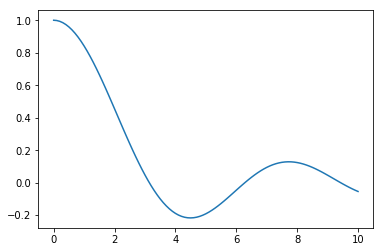

In [125]:
# Prepare data just like in Matlab
x = np.arange(0, 10.1, 0.1)

def sinc(x):
    if x == 0:
        return 1
    else:
        return (np.sin(x) / x)
    
y = [sinc(val) for val in x]

plot(x,y)

In [126]:
# Create a model with one hidden layer, just like in Matlab

model = Sequential()
model.add(Dense(10, input_shape=(1,)))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('linear'))

opti = Adam()

model.compile(optimizer=opti,
              loss='mean_squared_error')

In [127]:
# Train the model

history = model.fit(x, y, epochs=100, validation_split=0.15)

Train on 85 samples, validate on 16 samples
Epoch 1/100
85/85 [==============================] - 0s 5ms/step - loss: 2.2931 - val_loss: 2.9510
Epoch 2/100
85/85 [==============================] - 0s 81us/step - loss: 2.1485 - val_loss: 2.7518
Epoch 3/100
85/85 [==============================] - 0s 89us/step - loss: 2.0083 - val_loss: 2.5604
Epoch 4/100
85/85 [==============================] - 0s 84us/step - loss: 1.8726 - val_loss: 2.3755
Epoch 5/100
85/85 [==============================] - 0s 93us/step - loss: 1.7439 - val_loss: 2.1976
Epoch 6/100
85/85 [==============================] - 0s 82us/step - loss: 1.6192 - val_loss: 2.0279
Epoch 7/100
85/85 [==============================] - 0s 126us/step - loss: 1.5000 - val_loss: 1.8668
Epoch 8/100
85/85 [==============================] - 0s 102us/step - loss: 1.3874 - val_loss: 1.7139
Epoch 9/100
85/85 [==============================] - 0s 124us/step - loss: 1.2794 - val_loss: 1.5697
Epoch 10/100
85/85 [==============================] - 

Loss at last step: 0.040639
Validation loss at last step: 0.005721


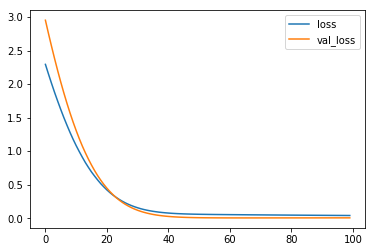

In [128]:
# Print loss graph

loss = history.history['loss']
val_loss = history.history['val_loss']
print("Loss at last step: %f" % loss[-1])
print("Validation loss at last step: %f" % val_loss[-1])
plot(loss, label='loss')
plot(val_loss, label='val_loss')
legend(loc='upper right')

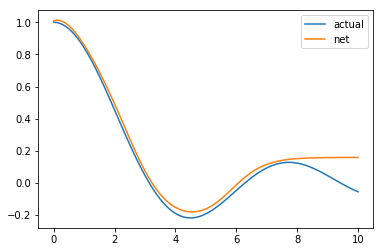

In [129]:
# Print both curves to show fit
plot(x, y, label='actual')
plot(x, y_net, label='net')
legend(loc='upper right')